In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
from scipy import stats

In [482]:
path = '/Users/jimmyswork/Downloads/datasets 2'
dir_list = os.listdir(path)
dir_list

['sales_week_starting_2013-01-07.csv',
 'sales_week_starting_2012-12-24.csv',
 'sales_week_starting_2012-12-31.csv',
 'sales_week_starting_2013-04-22.csv',
 'sales_week_starting_2012-10-08.csv',
 'sales_week_starting_2012-10-22.csv',
 'sales_week_starting_2013-04-08.csv',
 'sales_week_starting_2013-06-24.csv',
 'sales_week_starting_2013-08-19.csv',
 'sales_week_starting_2013-03-04.csv',
 'sales_week_starting_2013-03-11.csv',
 'sales_week_starting_2013-01-28.csv',
 'sales_week_starting_2013-01-14.csv',
 'sales_week_starting_2013-08-26.csv',
 'sales_week_starting_2013-09-02.csv',
 'sales_week_starting_2013-05-06.csv',
 'sales_week_starting_2012-11-05.csv',
 'sales_week_starting_2013-05-13.csv',
 'sales_week_starting_2013-02-18.csv',
 'sales_week_starting_2013-07-29.csv',
 'sales_week_starting_2013-07-15.csv',
 'sales_week_starting_2013-07-01.csv',
 'sales_week_starting_2012-11-12.csv',
 'sales_week_starting_2013-02-25.csv',
 'sales_week_starting_2013-09-09.csv',
 'sales_week_starting_201

In [483]:
df_list = [pd.read_csv(os.path.join(path,x)) for x in dir_list]
df_list

[                sale_time purchaser_gender
 0     2013-01-07 02:14:07           female
 1     2013-01-07 02:57:53             male
 2     2013-01-07 02:59:49           female
 3     2013-01-07 03:02:53             male
 4     2013-01-07 03:27:36           female
 ...                   ...              ...
 3370  2013-01-13 22:23:42           female
 3371  2013-01-13 22:24:26           female
 3372  2013-01-13 22:29:54           female
 3373  2013-01-13 22:56:41           female
 3374  2013-01-13 23:55:19           female
 
 [3375 rows x 2 columns],
                 sale_time purchaser_gender
 0     2012-12-24 01:06:36             male
 1     2012-12-24 01:24:41           female
 2     2012-12-24 02:27:53           female
 3     2012-12-24 02:36:06             male
 4     2012-12-24 02:36:34             male
 ...                   ...              ...
 3407  2012-12-30 22:48:36           female
 3408  2012-12-30 22:50:30             male
 3409  2012-12-30 22:59:53           female
 341

In [484]:
df = pd.concat(df_list,ignore_index=True)
df.head()

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female


In [485]:
df.shape

(204329, 2)

In [486]:
df['sale_time'] = pd.to_datetime(df['sale_time'])
df.dtypes

sale_time           datetime64[ns]
purchaser_gender            object
dtype: object

In [487]:
df['sale_time'] = df['sale_time'].sort_values(ascending=False)

In [488]:
df['sale_date'] = pd.to_datetime(df['sale_time'].dt.date)

In [489]:
start = df['sale_time'].min().normalize()
start

Timestamp('2012-10-01 00:00:00')

In [490]:
delta = df['sale_time'].dt.normalize() - start

In [491]:
df['week_idx'] = (delta.dt.days // 7) + 1

In [492]:
df = df.sort_values(by='week_idx',ascending=True).reset_index(drop=True)

In [493]:
weekly_counts = df.groupby('week_idx').size()
weekly_counts

week_idx
1     3545
2     3440
3     3451
4     3463
5     3696
6     3554
7     3526
8     3624
9     3622
10    3417
11    3599
12    3409
13    3412
14    3568
15    3375
16    3558
17    3462
18    3550
19    3490
20    3704
21    3700
22    3533
23    3576
24    3461
25    3548
26    3377
27    3490
28    3792
29    3558
30    3424
31    4999
32    5042
33    4882
34    4622
35    4978
36    4912
37    4965
38    5109
39    4765
40    4731
41    4851
42    4934
43    5012
44    4986
45    4996
46    4975
47    4819
48    4910
49    4918
50    4999
dtype: int64

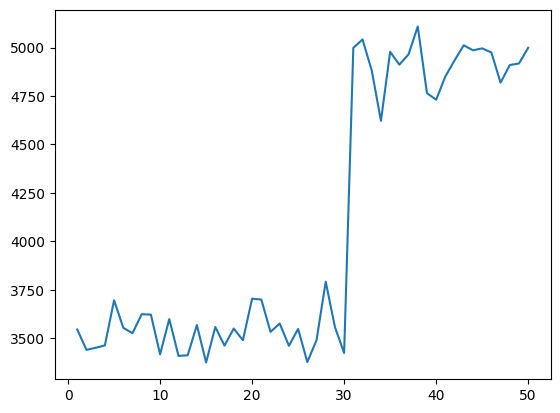

In [494]:
plt.plot(weekly_counts)

In [495]:
daily_counts = df.groupby('sale_date').size()
daily_counts

sale_date
2012-10-01    514
2012-10-02    482
2012-10-03    499
2012-10-04    546
2012-10-05    476
             ... 
2013-09-11    719
2013-09-12    735
2013-09-13    743
2013-09-14    655
2013-09-15    752
Length: 350, dtype: int64

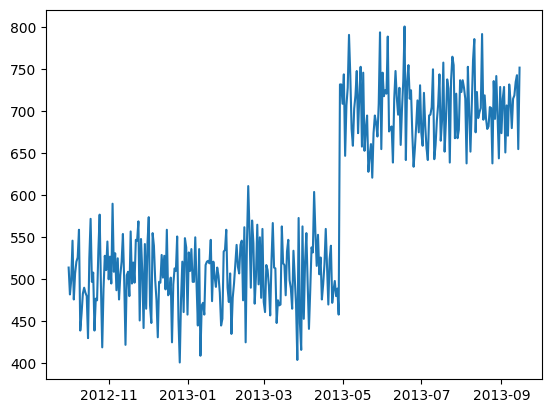

In [496]:
plt.plot(daily_counts)

In [497]:
daily_counts,weekly_counts

(sale_date
 2012-10-01    514
 2012-10-02    482
 2012-10-03    499
 2012-10-04    546
 2012-10-05    476
              ... 
 2013-09-11    719
 2013-09-12    735
 2013-09-13    743
 2013-09-14    655
 2013-09-15    752
 Length: 350, dtype: int64,
 week_idx
 1     3545
 2     3440
 3     3451
 4     3463
 5     3696
 6     3554
 7     3526
 8     3624
 9     3622
 10    3417
 11    3599
 12    3409
 13    3412
 14    3568
 15    3375
 16    3558
 17    3462
 18    3550
 19    3490
 20    3704
 21    3700
 22    3533
 23    3576
 24    3461
 25    3548
 26    3377
 27    3490
 28    3792
 29    3558
 30    3424
 31    4999
 32    5042
 33    4882
 34    4622
 35    4978
 36    4912
 37    4965
 38    5109
 39    4765
 40    4731
 41    4851
 42    4934
 43    5012
 44    4986
 45    4996
 46    4975
 47    4819
 48    4910
 49    4918
 50    4999
 dtype: int64)

In [498]:
daily_diff = daily_counts.diff()
daily_diff

sale_date
2012-10-01     NaN
2012-10-02   -32.0
2012-10-03    17.0
2012-10-04    47.0
2012-10-05   -70.0
              ... 
2013-09-11     4.0
2013-09-12    16.0
2013-09-13     8.0
2013-09-14   -88.0
2013-09-15    97.0
Length: 350, dtype: float64

In [499]:
jump_date = daily_diff.idxmax()
jump_date

Timestamp('2013-04-29 00:00:00')

In [500]:
jump_size = daily_diff.max()
jump_size

np.float64(274.0)

In [501]:
pre = daily_counts.loc[jump_date - pd.Timedelta(days=14): jump_date - pd.Timedelta(days=1)]
post = daily_counts.loc[jump_date:jump_date + pd.Timedelta(days=13)]

In [502]:
pre_sales = pre.values
post_sales = post.values

In [503]:
t_stat, p_value = stats.ttest_ind(pre_sales, post_sales)
p_value , t_stat

(np.float64(1.0912488695931745e-15), np.float64(-17.14164734473776))

In [504]:
sales_per_gender = df.groupby('purchaser_gender').size()
sales_per_gender

purchaser_gender
female    107740
male       96589
dtype: int64

In [505]:
pre_period = daily_counts.loc[jump_date - pd.Timedelta(days=14): jump_date - pd.Timedelta(days=1)]
post_period = daily_counts.loc[jump_date:jump_date + pd.Timedelta(days=13)]

In [506]:
pre_period_df = df[(df['sale_date'] > jump_date - pd.Timedelta(days=14)) & (df['sale_date'] < jump_date)]
post_period_df = df[(df['sale_date'] > jump_date) & (df['sale_date'] < jump_date + pd.Timedelta(days=13))]

In [507]:
pre_period_df

,sale_time,purchaser_gender,sale_date,week_idx
99350,2013-04-19 20:03:16,female,2013-04-19,29
99351,2013-04-19 20:06:07,male,2013-04-19,29
99353,2013-04-19 20:10:33,female,2013-04-19,29
99354,2013-04-19 20:12:15,female,2013-04-19,29
99355,2013-04-19 20:12:48,male,2013-04-19,29
...,...,...,...,...
105919,2013-04-24 16:06:19,female,2013-04-24,30
105920,2013-04-24 16:06:18,female,2013-04-24,30
105921,2013-04-24 16:06:15,female,2013-04-24,30
105922,2013-04-24 16:12:40,female,2013-04-24,30


In [508]:
pre_gender_counts = pre_period_df.groupby('purchaser_gender').size()
pre_gender_counts

purchaser_gender
female    3262
male      3244
dtype: int64

In [509]:
post_gender_counts = post_period_df.groupby('purchaser_gender').size()
post_gender_counts

purchaser_gender
female    4215
male      4346
dtype: int64

In [510]:
pre_total = pre_gender_counts.sum()
post_total = post_gender_counts.sum()

In [511]:
pre_prop = pre_gender_counts / pre_total
post_prop = post_gender_counts / post_total

In [512]:
pre_prop, post_prop

(purchaser_gender
 female    0.501383
 male      0.498617
 dtype: float64,
 purchaser_gender
 female    0.492349
 male      0.507651
 dtype: float64)

In [513]:
female_prop = [pre_prop['female'],post_prop['female']]
male_prop = [pre_prop['male'], post_prop['male']]

print(f'Female Proportion:{female_prop}, Male Proportion {male_prop}')

Female Proportion:[np.float64(0.501383338456809), np.float64(0.4923490246466534)], Male Proportion [np.float64(0.4986166615431909), np.float64(0.5076509753533466)]


<function matplotlib.pyplot.show(close=None, block=None)>

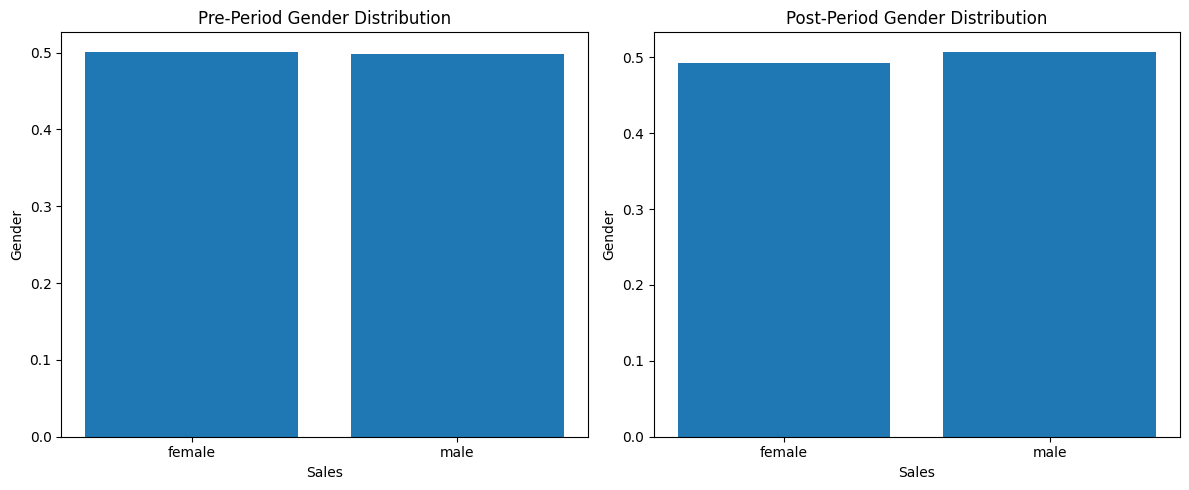

In [514]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.bar(pre_prop.index,pre_prop.values)
ax1.set_title('Pre-Period Gender Distribution')
ax1.set_ylabel('Gender')
ax1.set_xlabel('Sales')

ax2.bar(post_prop.index, post_prop.values)
ax2.set_title('Post-Period Gender Distribution')
ax2.set_ylabel('Gender')
ax2.set_xlabel('Sales')

plt.tight_layout()
plt.show

In [515]:
df

,sale_time,purchaser_gender,sale_date,week_idx
0,2012-10-05 12:17:56,female,2012-10-05,1
1,2012-10-05 12:16:57,female,2012-10-05,1
2,2012-10-05 12:21:39,female,2012-10-05,1
3,2012-10-05 12:21:47,male,2012-10-05,1
4,2012-10-05 12:26:38,female,2012-10-05,1
...,...,...,...,...
204324,2013-09-13 18:23:13,male,2013-09-13,50
204325,2013-09-13 18:23:41,male,2013-09-13,50
204326,2013-09-13 18:27:24,male,2013-09-13,50
204327,2013-09-13 18:13:00,male,2013-09-13,50


In [520]:
df['hour'] = df['sale_time'].dt.hour

In [534]:
df

,sale_time,purchaser_gender,sale_date,week_idx,hour
0,2012-10-05 12:17:56,female,2012-10-05,1,12
1,2012-10-05 12:16:57,female,2012-10-05,1,12
2,2012-10-05 12:21:39,female,2012-10-05,1,12
3,2012-10-05 12:21:47,male,2012-10-05,1,12
4,2012-10-05 12:26:38,female,2012-10-05,1,12
...,...,...,...,...,...
204324,2013-09-13 18:23:13,male,2013-09-13,50,18
204325,2013-09-13 18:23:41,male,2013-09-13,50,18
204326,2013-09-13 18:27:24,male,2013-09-13,50,18
204327,2013-09-13 18:13:00,male,2013-09-13,50,18


In [532]:
bins = [0,5,11,17,23]
labels = ['night','morning','afternoon','evening']

In [535]:
df['time_of_day'] = pd.cut(df['hour'], bins=bins, labels=labels)

In [ ]:
df['time_of_day'].value_counts(normalize=True)

time_of_day
afternoon    0.394652
morning      0.308094
evening      0.208859
night        0.088395
Name: proportion, dtype: float64

In [557]:
sales_by_period_proportion = df['time_of_day'].value_counts(normalize=True)

Text(0.5, 1.0, 'Proportion of Sales by Time of Day')

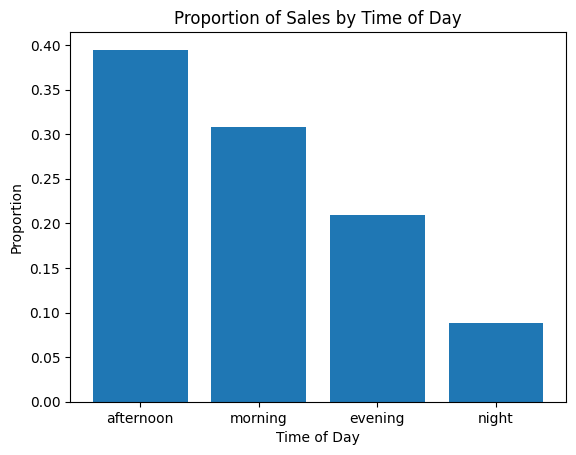

In [573]:
plt.plot(figsize=(15,8))
plt.bar(sales_by_period_proportion.index, sales_by_period_proportion.values)
plt.xlabel('Time of Day')
plt.ylabel('Proportion')
plt.title('Proportion of Sales by Time of Day')